## Time Series Forecasting (Visualizing the Future)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

import warnings
warnings.filterwarnings('ignore')

**Generate sample data**

* Example: Forecasting Sales with Confidence Intervals

In [3]:
np.random.seed(80)
dates = pd.date_range(start='2023-01-01', end='2023-12-31', freq='D')
sales = np.cumsum(np.random.randn(len(dates))) + 50
df = pd.DataFrame({'Date': dates, 'Sales': sales})

In [4]:
df

,Date,Sales
0,2023-01-01,51.899853
1,2023-01-02,52.108656
2,2023-01-03,53.003867
3,2023-01-04,51.823138
4,2023-01-05,52.096670
...,...,...
360,2023-12-27,90.835173
361,2023-12-28,91.321088
362,2023-12-29,92.229249
363,2023-12-30,92.198641


**Forecasting with ARIMA**

In [5]:
# Fit ARIMA model
model = ARIMA(df['Sales'], order=(1,1,1))
results = model.fit()

In [6]:
# Generate forecast
forecast_steps = 30
forecast = results.get_forecast(steps=forecast_steps)
mean_forecast_ar = forecast.predicted_mean
confidence_intervals = forecast.conf_int()
forecast_index_ar = pd.date_range(start=df['Date'].iloc[-1] + pd.Timedelta(days=1), periods=forecast_steps)

**Create visualization**

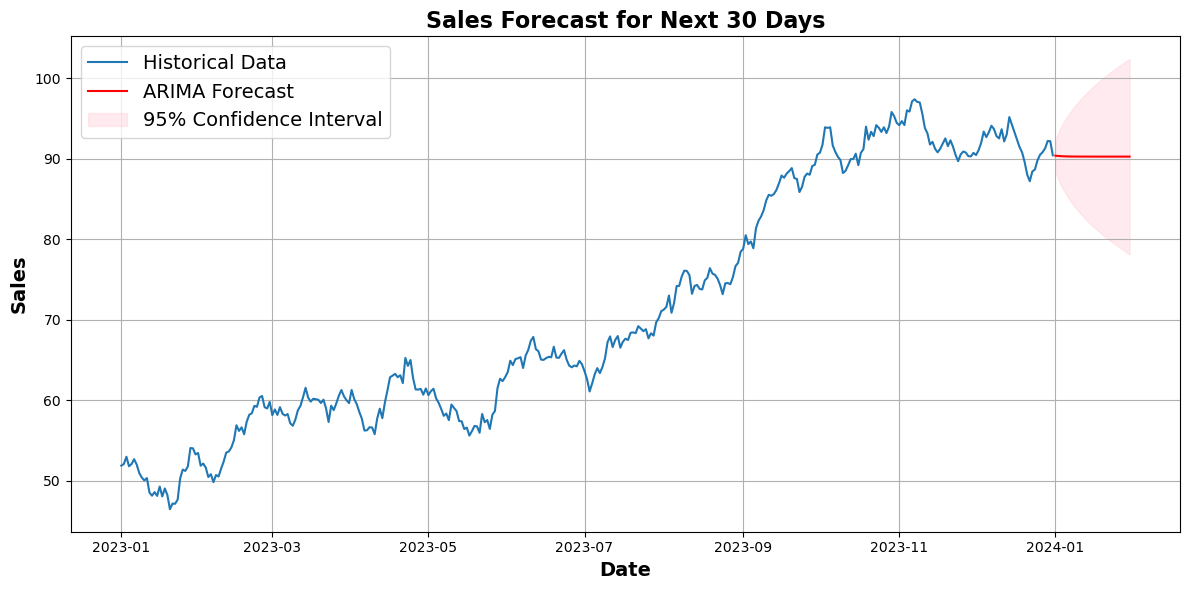

In [7]:
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Sales'], label='Historical Data')
plt.plot(forecast_index_ar, mean_forecast_ar, color='red', label='ARIMA Forecast')
plt.fill_between(forecast_index_ar, 
                 confidence_intervals.iloc[:, 0], 
                 confidence_intervals.iloc[:, 1], 
                 color='pink', alpha=0.3, label='95% Confidence Interval')

plt.title('Sales Forecast for Next 30 Days', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=14, fontweight='bold')
plt.ylabel('Sales', fontsize=14, fontweight='bold')
plt.legend(loc='upper left', fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.savefig('./images/sales_forecast_arima.png', dpi=300, bbox_inches='tight')
plt.show()

----

**Forecasting with ETS**

In [8]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [9]:
# Forecasting with Exponential Smoothing
model = ExponentialSmoothing(df['Sales'], trend='add', seasonal=None)
model_fit = model.fit()

In [10]:
# Generate forecast
forecast_steps = 30
mean_forecast_ets = model_fit.forecast(steps=forecast_steps)
forecast_index_ets = pd.date_range(start=df['Date'].iloc[-1] + pd.Timedelta(days=1), periods=forecast_steps)

**Visualization**

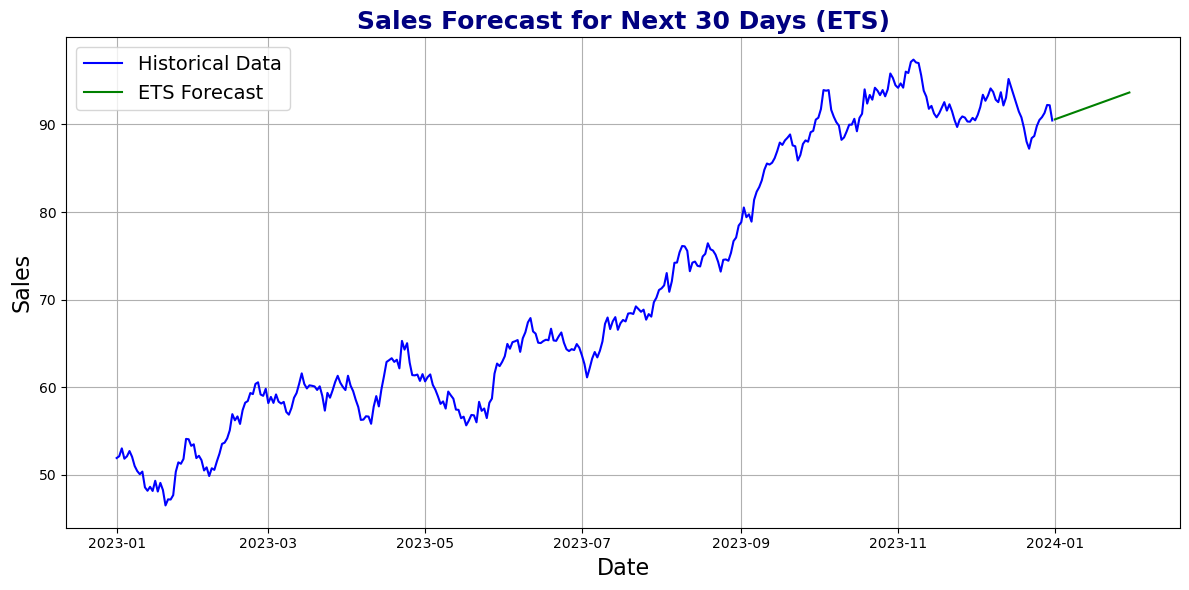

In [11]:
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Sales'], label='Historical Data', color='blue')
plt.plot(forecast_index_ets, mean_forecast_ets, color='green', label='ETS Forecast')

plt.title('Sales Forecast for Next 30 Days (ETS)', fontsize=18, fontweight='bold', color='navy')
plt.xlabel('Date', fontsize=16)
plt.ylabel('Sales', fontsize=16)
plt.legend(loc= 'upper left', fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.savefig('./images/sales_forecast_ets.png', dpi=300, bbox_inches='tight')
plt.show()

In [12]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

In [13]:
# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df['Sales'].values.reshape(-1, 1))

# Prepare data for LSTM
X_train, y_train = [], []
for i in range(60, len(scaled_data) - 30):
    X_train.append(scaled_data[i-60:i, 0])
    y_train.append(scaled_data[i:i+30, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshape data for LSTM
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))

**Build LSTM model**

In [14]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(50))
model.add(Dense(30))
model.compile(optimizer='adam', loss='mean_squared_error')

**Fit the model**

In [15]:
model.fit(X_train, y_train, epochs=50, batch_size=32)

Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 7s 94ms/step - loss: 0.3621
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 119ms/step - loss: 0.2123
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step - loss: 0.0933
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0368
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 0.0112
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 0.0063
Epoch 7/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 0.0050
Epoch 8/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - loss: 0.0041
Epoch 9/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - loss: 0.0039
Epoch 10/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.0039
Epoch 11/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - loss: 0.0037
Epoch 12/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 0.0034
Epoch 13/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 0.0034
Epoch 14/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - loss: 0.0034
Epoch 15/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - loss: 0.0034
Epoch 16/50
9/9 ━━━━━━━━━━━━━━━━━

In [16]:
# Forecast
last_60_days = scaled_data[-60:].reshape((1, 60, 1))
predicted_sales = model.predict(last_60_days)
predicted_sales = scaler.inverse_transform(predicted_sales)

forecast_index = pd.date_range(start=df['Date'].iloc[-1] + pd.Timedelta(days=1), periods=30)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 551ms/step


**Visualization**

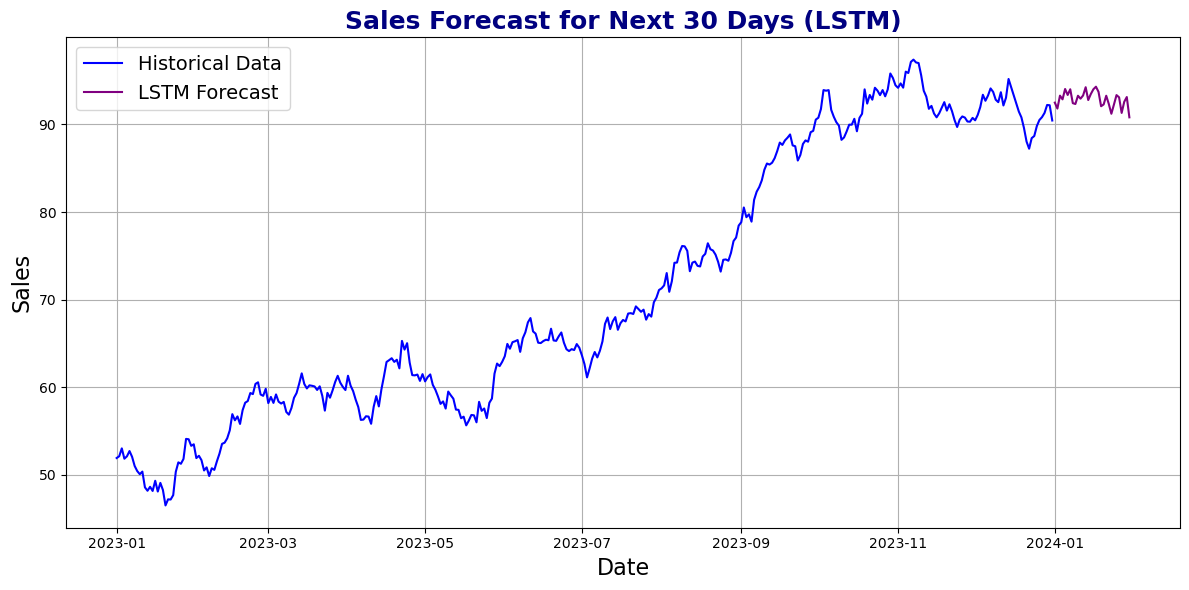

In [17]:
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Sales'], label='Historical Data', color='blue')
plt.plot(forecast_index, predicted_sales.flatten(), color='purple', label='LSTM Forecast')

plt.title('Sales Forecast for Next 30 Days (LSTM)', fontsize=18, fontweight='bold', color='navy')
plt.xlabel('Date', fontsize=16)
plt.ylabel('Sales', fontsize=16)
plt.legend(loc='upper left', fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.savefig('./images/sales_forecast_lstm.png', dpi=300, bbox_inches='tight')
plt.show()

**Visualize all forecasts in one plot**

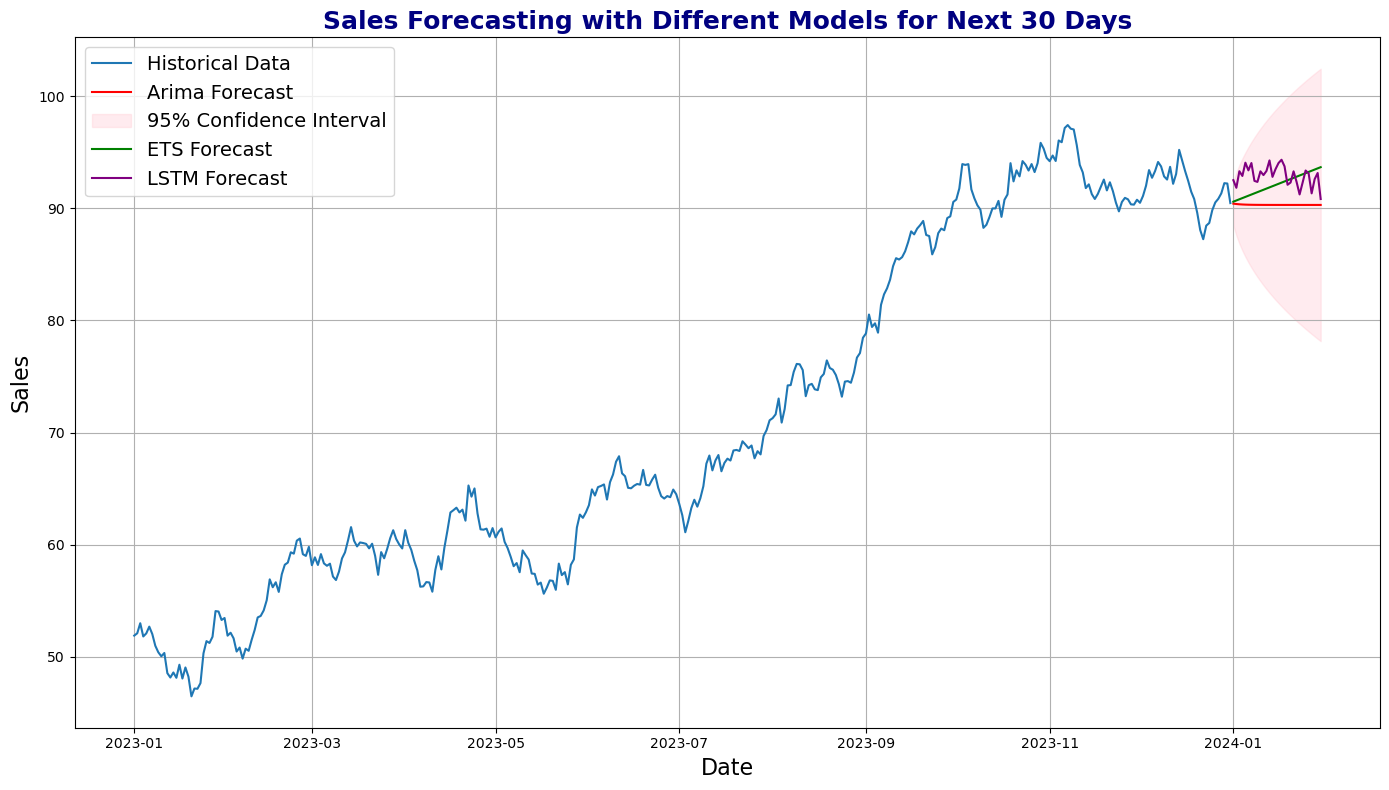

In [18]:
plt.figure(figsize=(14, 8))

# ARIMA
plt.plot(df['Date'], df['Sales'], label='Historical Data')
plt.plot(forecast_index_ar, mean_forecast_ar, color='red', label='Arima Forecast')
plt.fill_between(forecast_index_ar, 
                 confidence_intervals.iloc[:, 0], 
                 confidence_intervals.iloc[:, 1], 
                 color='pink', alpha=0.3, label='95% Confidence Interval')

# ETS
plt.plot(forecast_index_ets, mean_forecast_ets, color='green', label='ETS Forecast')

plt.plot(forecast_index, predicted_sales.flatten(), color='purple', label='LSTM Forecast')

plt.title('Sales Forecasting with Different Models for Next 30 Days', fontsize=18, fontweight='bold', color='navy')
plt.xlabel('Date', fontsize=16)
plt.ylabel('Sales', fontsize=16)
plt.legend(fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.savefig('./images/sales_forecast_all_models.png', dpi=300, bbox_inches='tight')
plt.show()

---